In [2]:
import os

from fastai.vision.all import * 
from fastai.vision import *

import pandas as pd

In [27]:
def create_labels_csv_file(dataset_path: str) -> None:
    class_names = []
    for folder_name in os.listdir(dataset_path):
        class_names.append(folder_name)

    image_paths = []
    labels = []

    for i in range(len(class_names)):
        class_name = class_names[i]
        if '.csv' in os.path.basename(class_name):
            continue
        image_names = os.listdir(
            os.path.join(
                dataset_path,
                class_name
            )
        )
        for image_name in image_names:
            image_path = os.path.join(
                dataset_path,
                class_name,
                image_name
            )
            image_paths.append(image_path)
            labels.append(i)

    df = pd.DataFrame(
        {
            'name': image_paths,
            'label': labels
        }
    )

    df.to_csv(
        path_or_buf=os.path.join(
            dataset_path,
            'labels.csv'
        ),
        index=False
    )

In [28]:
create_labels_csv_file(
    dataset_path=os.path.join(
        'dataset',
        'train'
    )
)

create_labels_csv_file(
    dataset_path=os.path.join(
        'dataset',
        'valid'
    )
)

In [29]:
dls = ImageDataLoaders.from_folder(
    path='dataset',
    train='train',
    valid='valid',
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()]
)

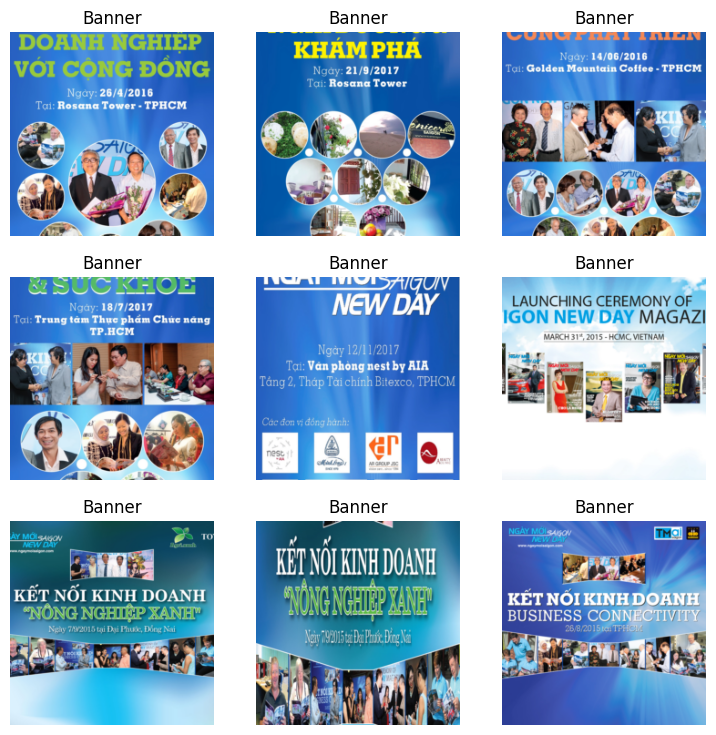

In [30]:
dls.valid.show_batch()

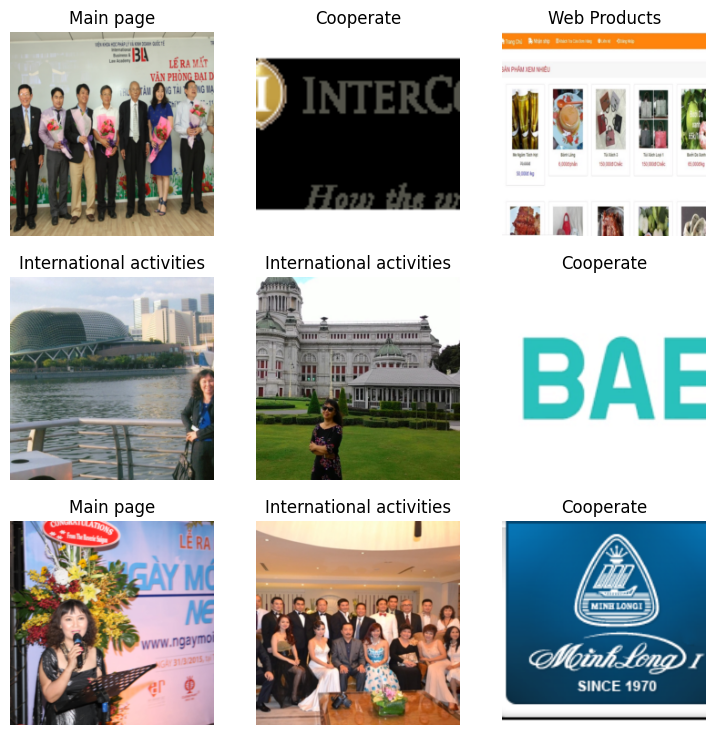

In [31]:
dls.train.show_batch()

In [32]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

In [42]:
model.fine_tune(
    epochs=5
)

epoch,train_loss,valid_loss,accuracy,error_rate,time


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.196356,0.126579,0.974522,0.025478,00:39
1,0.187603,0.190157,0.974522,0.025478,00:38
2,0.158434,0.040924,0.987261,0.012739,00:39
3,0.141518,0.053413,0.993631,0.006369,00:39
4,0.146541,0.083350,0.980892,0.019108,00:39


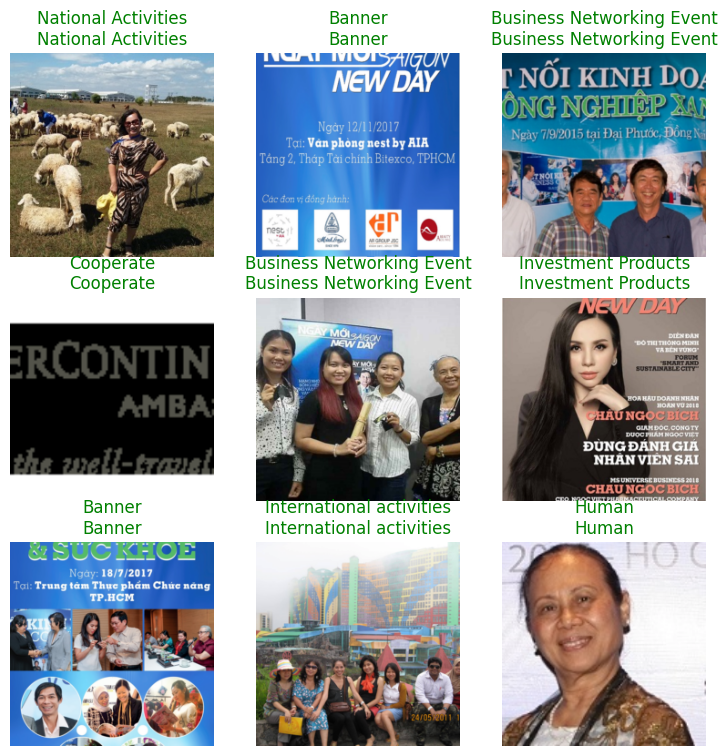

In [43]:
model.show_results()

In [44]:
model.validate()

(#3) [0.08334977179765701,0.9808917045593262,0.019108280539512634]

In [45]:
model.export('intel_scene_classifier_ver03.pkl')

In [7]:
new_model = load_learner('dataset\intel_scene_classifier.pkl')

In [9]:
new_model.predict(
    item="D:\KhoaLuan\KhoaLuan\dataset\test\test\hinh1.jpg"
)

OSError: [Errno 22] Invalid argument: 'D:\\KhoaLuan\\KhoaLuan\\dataset\test\test\\hinh1.jpg'